In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cosmopower_jax.cosmopower_jax import CosmoPowerJAX as CPJ

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
stix = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/STIXGeneral.ttf')
mpl.rcParams['font.serif']=stix.get_name()
mpl.rcParams['mathtext.fontset']='stix'
mpl.rc('axes', unicode_minus=False)

In [3]:
# colour maps
import matplotlib.pyplot as plt
import matplotlib.cm as cm
color_R=['#56B4E9','#E69F00','#009E72','#F0E442','#0072B2','#D55E00','#CC79A7'] # Okabe&Ito (ish)

In [15]:
param_strings_dict={
    'omega_b': r'$\Omega_b$',
    'omega_cdm': r'$\Omega_c$',
    'h': r'$h$',
    # 'tau_reio': np.linspace(0.08,0.12,N_param_vals),
    # 'n_s': np.linspace(0.95,0.97,N_param_vals), 
    # 'ln10^{10}A_s': np.linspace(3.05,3.15,N_param_vals),
    # 'cmin': np.linspace(2.5,2.7,N_param_vals),
    # 'eta_0': np.linspace(0.6,0.8,N_param_vals), 
    # 'z': np.linspace(0.0,2.0,N_param_vals)
}

In [5]:
N_param_vals=5
cosmo_params_dict={
    'omega_b': np.linspace(0.020,0.030,N_param_vals),
    'omega_cdm': np.linspace(0.08,0.14,N_param_vals), 
    'h': np.linspace(0.66,0.68,N_param_vals), 
    'tau_reio': np.linspace(0.08,0.12,N_param_vals),
    'n_s': np.linspace(0.95,0.97,N_param_vals), 
    'ln10^{10}A_s': np.linspace(3.05,3.15,N_param_vals),
    'cmin': np.linspace(2.5,2.7,N_param_vals),
    'eta_0': np.linspace(0.6,0.8,N_param_vals), 
    'z': np.linspace(0.0,2.0,N_param_vals)
}

In [6]:
emulator = CPJ(probe='mpk_nonlin')
emulator_predictions = emulator.predict(cosmo_params_dict)

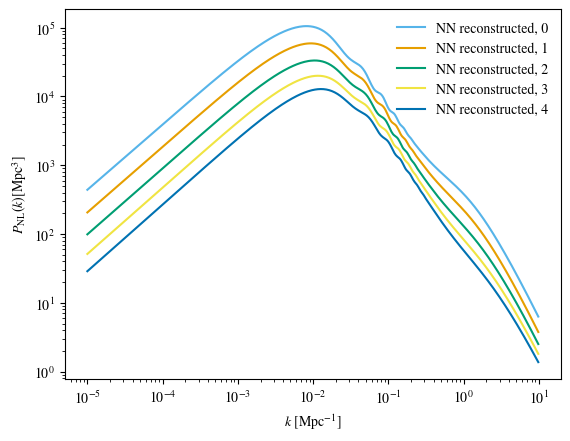

In [7]:
# and finally plot
k_range = emulator.modes
fig, ax = plt.subplots()
pred = emulator_predictions
for i in range(N_param_vals):
    ax.loglog(k_range, pred[i], color_R[i], label = 'NN reconstructed, %s' %i, linestyle='-')
    ax.set_xlabel('$k$ [Mpc$^{-1}]$')
    ax.set_ylabel('$P_{\mathrm{NL}}(k) [\mathrm{Mpc}^3]$')

ax.legend(frameon=False,loc=1)

# latin hypercube

In [99]:
cosmo_params_dict={
    'omega_b': np.array([0.025]),
    'omega_cdm': np.array([0.11]), 
    'h': np.array([0.6711]), 
    'n_s': np.array([0.9624]), 
    'ln10^{10}A_s': np.array([3.1]),
    'cmin': np.array([2.6]),
    'eta_0': np.array([0.7]), 
    'z': np.array([0.0])
}

In [100]:
bounds_dict={
    'omega_b': [0.020,0.030],
    'omega_cdm': [0.08,0.14], 
    'h': [0.66,0.68], 
    'tau_reio': [0.08,0.12],
    'n_s': [0.95,0.97], 
    'ln10^{10}A_s': [3.05,3.15],
    'cmin': [2.5,2.7],
    'eta_0': [0.6,0.8], 
    'z': [0.0,0.0]
}




In [134]:
params=np.array(['omega_b','beth'])
cosmo_params_dict.items()
# np.where(params=='beth')[0][0]

dict_items([('omega_b', array([0.025])), ('omega_cdm', array([0.11])), ('h', array([0.6711])), ('n_s', array([0.9624])), ('ln10^{10}A_s', array([3.1])), ('cmin', array([2.6])), ('eta_0', array([0.7])), ('z', array([0.]))])

In [150]:
for i,item in enumerate(cosmo_params_dict.items()):
    print(i,item[0])

0 omega_b
1 omega_cdm
2 h
3 n_s
4 ln10^{10}A_s
5 cmin
6 eta_0
7 z


In [95]:
from scipy.stats import qmc
def HypercubeGo(params,N_samples):
    d = len(params) # dimension of the parameter space.
    sampler = qmc.LatinHypercube(d)
    sample = sampler.random(n=N_samples)
    # change limits for each param
    for i,param in enumerate(params):
        lower_bound,upper_bound=bounds_dict[param]
        dlt=upper_bound-lower_bound
        sample[:,i]*=dlt
        sample[:,i]+=lower_bound
    return sample

def MPkHypercube(i,params,sample):
    params_full=np.zeros(len(cosmo_params_dict.items()))
    for item_i,item in enumerate(cosmo_params_dict.items()):
        if item[0] in params:
            n=np.where(params==item[0])[0][0]
            # print(n,i)
            params_full[item_i]=sample[i,n]
        else:
            param=item[0]
            # print(param,item_i)
            params_full[item_i]=cosmo_params_dict[param]
    emulator = CPJ(probe='mpk_nonlin')
    pred = emulator.predict(params_full)
    k_range = emulator.modes
    return k_range,pred,params_full
    
    


(10, 3)


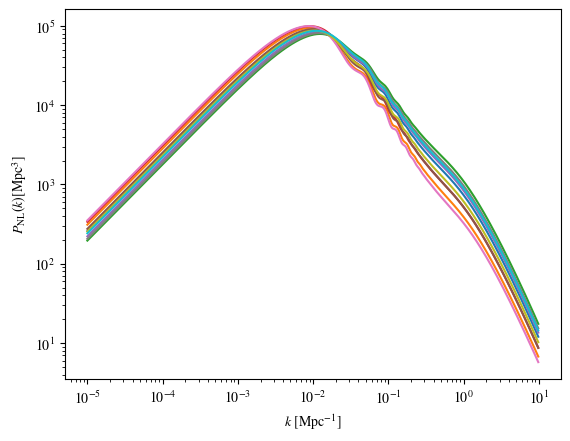

In [102]:
import os
save_Pks=False
N_samples=10
N_params=8
params=np.array(['omega_b','omega_cdm','h'])
sample=HypercubeGo(params,N_samples)
print(np.shape(sample))

# MPkHypercube(0,params,sample)

fig, ax = plt.subplots()
for i in range(N_samples):

    k_range,pred,p_values=MPkHypercube(i,params,sample)
    if save_Pks==True:
        if i==0:
            Pks=np.zeros((len(k_range),N_samples))
            param_values=np.zeros((len(params),N_samples))
        Pks[:,i]=pred
        param_values[:,i]=sample[i,:]

        folder='predicted_mPks_2/'
    ax.loglog(k_range, pred, label = 'NN reconstructed, %s' %i, linestyle='-')
    ax.set_xlabel('$k$ [Mpc$^{-1}]$')
    ax.set_ylabel('$P_{\mathrm{NL}}(k) [\mathrm{Mpc}^3]$')
if save_Pks==True:
    if not os.path.exists(folder): os.makedirs(folder)
    np.savetxt(folder+'predicted_mPks_%ssamples.dat' %N_samples,Pks)
    np.savetxt(folder+'params_for_predicted_mPks_%ssamples.dat' %N_samples,param_values,header='param values used to generate samples, params:'+str(params))


    

# ax.legend(frameon=False,loc=1)



# compression CCA

In [79]:
def Cov_Matrix(Pks,N_sims=1000): 
	data_vector=np.empty([0,N_sims])
	data_vector=np.concatenate((data_vector,Pks[:,:N_sims]))
	cov_matrix=np.cov(data_vector)
	return(cov_matrix)

In [80]:
Pks=np.loadtxt('predicted_mPks/predicted_mPks_4012samples.dat')
params_all=np.loadtxt('predicted_mPks/params_for_predicted_mPks_4012samples.dat')

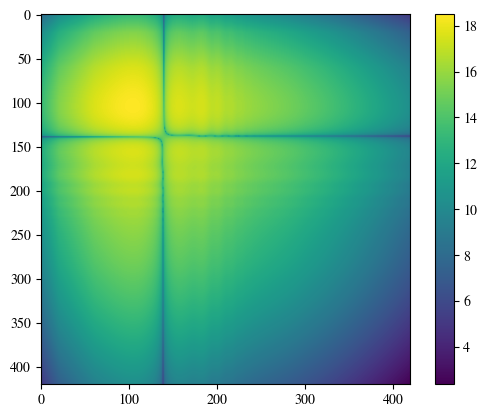

In [81]:
plt.imshow(np.log(abs(Cov_Matrix(Pks,4012))))
plt.colorbar()

In [87]:
Pks.shape

(420, 4012)

In [93]:
cov_x=Cov_Matrix(Pks,4012)
Pks_noisy = np.zeros(Pks.shape)
for i in range(Pks.shape[1]):
    Pks_noisy[:,i] = np.random.multivariate_normal(Pks[:,i], cov_x)


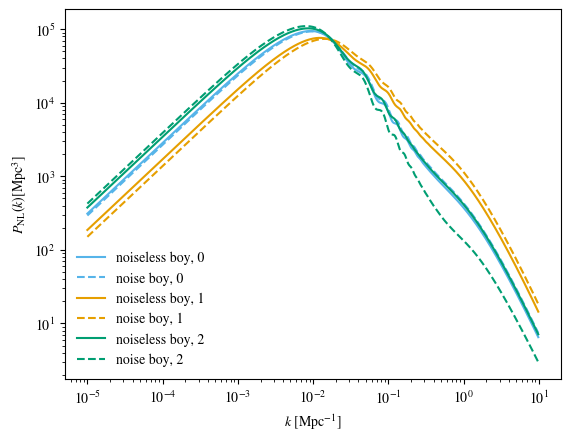

In [109]:
fig, ax = plt.subplots()
for i in range(3):
    k_range,pred,p_values=MPkHypercube(i,params,sample)
    Pk=Pks[:,i]
    Pk_noisy=Pks_noisy[:,i]
    ax.loglog(k_range, Pk, color=color_R[i],label = 'noiseless boy, %s' %i, linestyle='-')
    ax.loglog(k_range, Pk_noisy, color=color_R[i],label = 'noise boy, %s' %i, linestyle='--')
ax.set_xlabel('$k$ [Mpc$^{-1}]$')
ax.set_ylabel('$P_{\mathrm{NL}}(k) [\mathrm{Mpc}^3]$')
ax.legend(frameon=False)


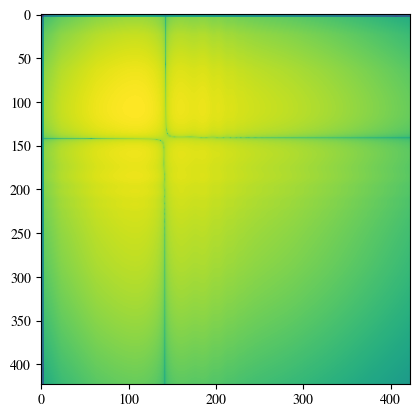

In [110]:
import scipy
N_params=len(params_all)

mat=np.vstack((params_all,Pks_noisy))
cov=np.cov(mat)
# cov=np.cov(params_all,Pks)
plt.imshow(np.log(abs(cov)))
cp = cov[:N_params,:N_params]
cd = cov[N_params:,N_params:]
cpd = cov[:N_params,N_params:]

cl = cpd.T@np.linalg.inv(cp)@cpd

evals, evecs = scipy.linalg.eigh(cd, cd - cl)

evals = evals[::-1][:N_params]
evecs = evecs[:,::-1][:,:N_params]

dv_LFI=np.loadtxt('predicted_mPks_2/predicted_mPks_4012samples.dat').T

compressed_dv = dv_LFI@evecs
np.savetxt('compressed_dv_4012samples.dat',compressed_dv,header='param values used to generate samples, params:'+str(params))



In [209]:
np.shape(compressed_dv)

(4012, 3)

# sbi

In [111]:
%load_ext autoreload
%autoreload 2

# ignore warnings for readability
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import torch
import torch.nn as nn

import ili
from ili.dataloaders import NumpyLoader
from ili.inference import InferenceRunner
from ili.validation.metrics import PosteriorCoverage, PlotSinglePosterior

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Device: cpu


In [147]:
x=np.loadtxt('predicted_mPks/predicted_mPks_4012samples.dat').T
# x=np.loadtxt('compressed_dv_4012samples.dat')
theta=np.loadtxt('predicted_mPks/params_for_predicted_mPks_4012samples.dat').T
params=np.array(['omega_b','omega_cdm','h'])


In [148]:
# make a dataloader
loader = NumpyLoader(x=x, theta=theta)

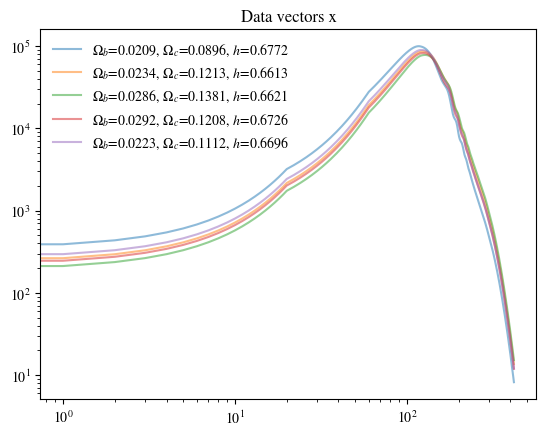

In [149]:
# plot some examples of the data
fig, ax = plt.subplots()#figsize=(8, 6))
for i in range(5):
    ind = np.random.randint(len(theta))
    ax.loglog(x[ind], alpha=0.5, label='%s=%.4f, %s=%.4f, %s=%.4f' %(param_strings_dict[params[0]],theta[ind,0],param_strings_dict[params[1]],theta[ind,1],param_strings_dict[params[2]],theta[ind,2]))
ax.legend(frameon=False)
ax.set_title('Data vectors x')
plt.show()

The SBIRunner object will handle all of the data normalization and model training for us. We just need to provide it with:
- our parameter prior
- our inference type (SNPE/SNLE/SNRE)
- our desired neural network architecture
- our training hyperparameters

On the backend, it does a validation split among the provided training data, trains the neural networks with an Adam optimizer, and enforces an early stopping criterion to prevent overfitting. All the parameters of these processes can be independently configured.

In [150]:
# define a prior
lowbounds=[bounds_dict[params[i]][0] for i in range(len(params))]
highbounds=[bounds_dict[params[i]][1] for i in range(len(params))]
prior = ili.utils.Uniform(low=lowbounds, high=highbounds, device=device)

# instantiate your neural networks to be used as an ensemble
repeats_maf = 2 # not to have to duplicate code for a large ensemble of identical architectures
nets = [
    ili.utils.load_nde_sbi(engine='NPE', model='maf', hidden_features=50, num_transforms=5, repeats = repeats_maf),
    ili.utils.load_nde_sbi(engine='NPE', model='mdn', hidden_features=50, num_components=6)
]

# define training arguments
train_args = {
    'training_batch_size': 32,
    'learning_rate': 1e-4
}

# initialize the trainer
runner = InferenceRunner.load(
    backend='sbi',
    engine='NPE',
    prior=prior,
    nets=nets,
    device=device,
    train_args=train_args,
    proposal=None,
    out_dir=None
)

In [151]:
# train the model
posterior_ensemble, summaries = runner(loader=loader)

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 3.


 Training neural network. Epochs trained: 212

INFO:root:Training model 2 / 3.


 Training neural network. Epochs trained: 192213 epochs.

INFO:root:Training model 3 / 3.


 Training neural network. Epochs trained: 151193 epochs.

INFO:root:It took 316.4992530345917 seconds to train models.


 Neural network successfully converged after 152 epochs.

Here, the output of the runner is a posterior model and a log of training statistics. The posterior model is a [NeuralPosteriorEnsemble](https://github.com/mackelab/sbi/blob/6c4fa7a6fd254d48d0c18640c832f2d80ab2257a/sbi/utils/posterior_ensemble.py#L19) model and automatically combines samples and probability densities from its component networks.

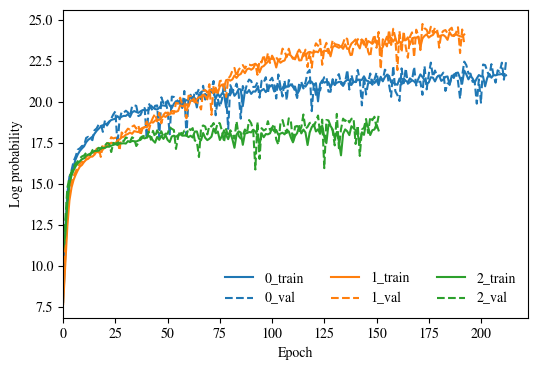

In [152]:
# plot train/validation loss
fig, ax = plt.subplots(1, 1, figsize=(6,4))
c = list(mcolors.TABLEAU_COLORS)
for i, m in enumerate(summaries):
    ax.plot(-1.0*np.array(m['training_loss']), ls='-', label=f"{i}_train", c=c[i])
    ax.plot(-1.0*np.array(m['validation_loss']), ls='--', label=f"{i}_val", c=c[i])
ax.set_xlim(0)
ax.set_xlabel('Epoch')
ax.set_ylabel('Log probability')
ax.legend(frameon=False,loc=4,ncol=3)

We now can take the posterior model learned by the InferenceRunner and use it to make predictions on new data. First, we consider generating samples from a posterior conditioned on a single observation.

In [153]:
# choose a random input
seed_in = 49
np.random.seed(seed_in)
ind = np.random.randint(len(theta))

# generate samples from the posterior using accept/reject sampling
seed_samp = 32
torch.manual_seed(seed_samp)
samples = posterior_ensemble.sample((1000,), torch.Tensor(x[ind]).to(device))

# calculate the log_prob for each sample
log_prob = posterior_ensemble.log_prob(samples, torch.Tensor(x[ind]).to(device))

samples = samples.cpu().numpy()
log_prob = log_prob.cpu().numpy()

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/904 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

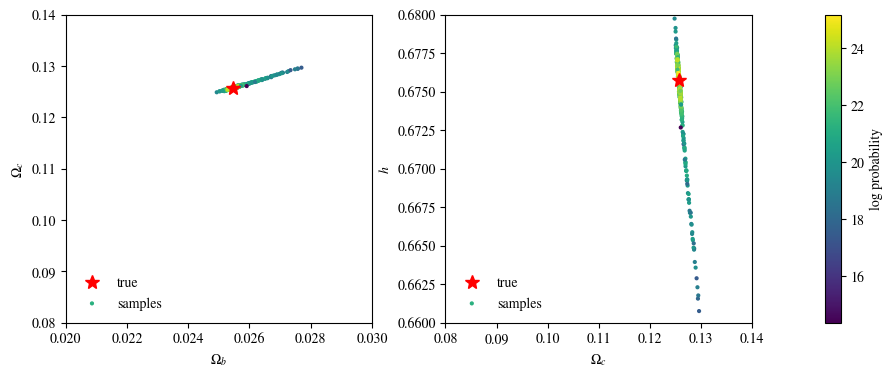

In [157]:
# plot the posterior samples and the true value
fig, axs = plt.subplots(1, 3, figsize=(10,4), gridspec_kw={'width_ratios': [1,1,0.05]})
plt.subplots_adjust(wspace=0.35)
for i in range(2):
    axs[i].plot(theta[ind,i], theta[ind,i+1], '*', color='red', markersize=10, label='true')
    im = axs[i].scatter(samples[:,i], samples[:,i+1], c=log_prob, s=4, label='samples')
    # axs[i].set_aspect('equal')
    axs[i].set_xlim(tuple(bounds_dict[params[i]]))
    axs[i].set_ylim(tuple(bounds_dict[params[i+1]]))
    axs[i].set_xlabel(param_strings_dict[params[i]])
    axs[i].set_ylabel(param_strings_dict[params[i+1]])
    axs[i].legend(frameon=False,loc=3)
plt.colorbar(im, label='log probability', use_gridspec=True, cax=axs[2])

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/907 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

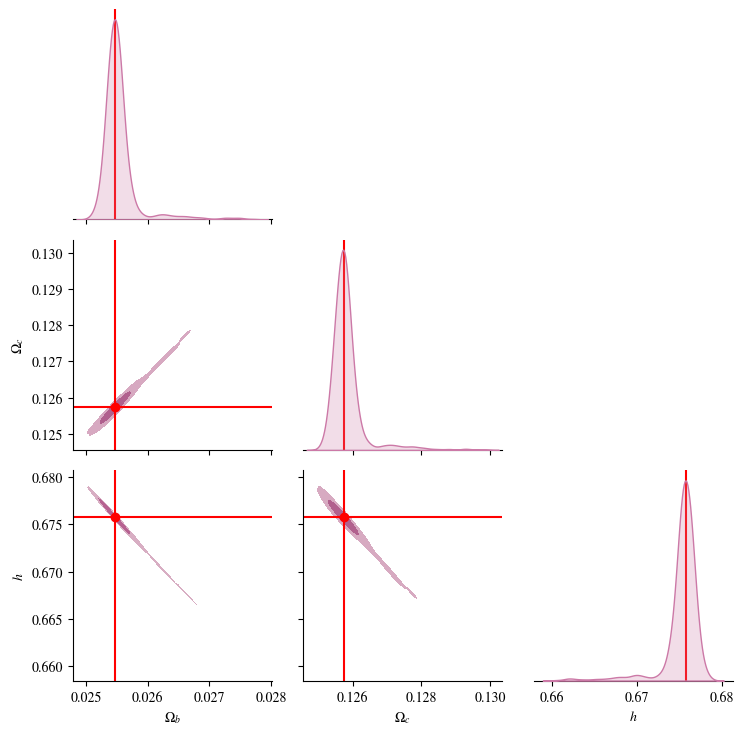

In [155]:
# use ltu-ili's built-in validation metrics to plot the posterior for this point
metric = PlotSinglePosterior(
    num_samples=1000, sample_method='direct', 
    labels=[param_strings_dict[params[i]] for i in range(3)]
)
fig = metric(
    posterior=posterior_ensemble,
    x_obs = x[ind], theta_fid=theta[ind],
    plot_kws=dict(fill=True,color=color_R[6])
)
plt.savefig('posteriors_noisy_3p.png')

 73%|███████▎  | 2930/4012 [01:05<00:24, 43.48it/s]WARNING:root:Only 0.436% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    59 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
100%|██████████| 4012/4012 [01:29<00:00, 44.77it/s]
INFO:root:Mean logprob: 2.3993e+01Median logprob: 2.4014e+01
100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


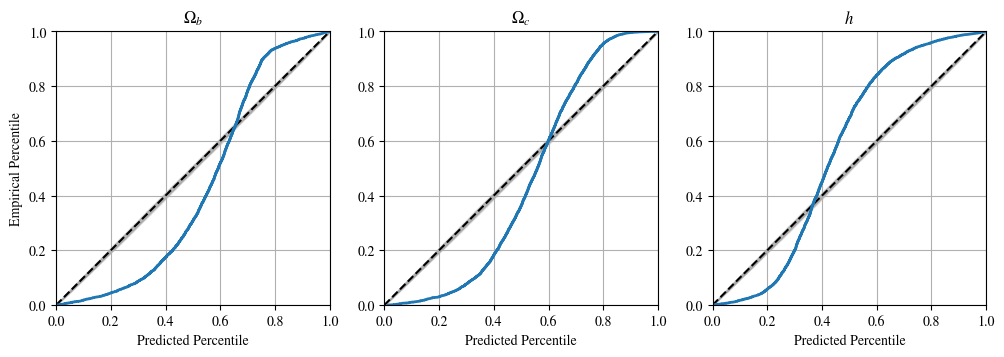

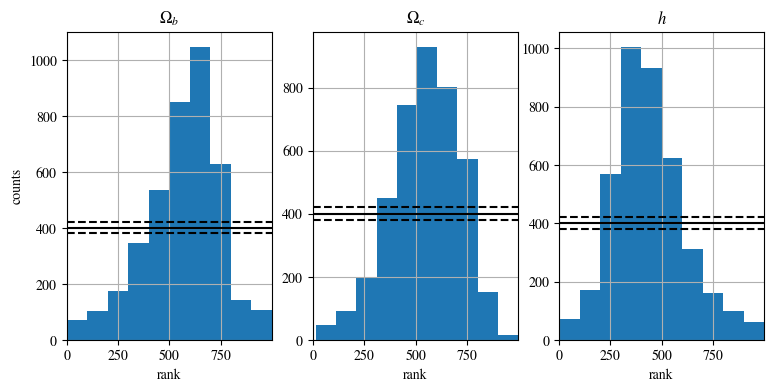

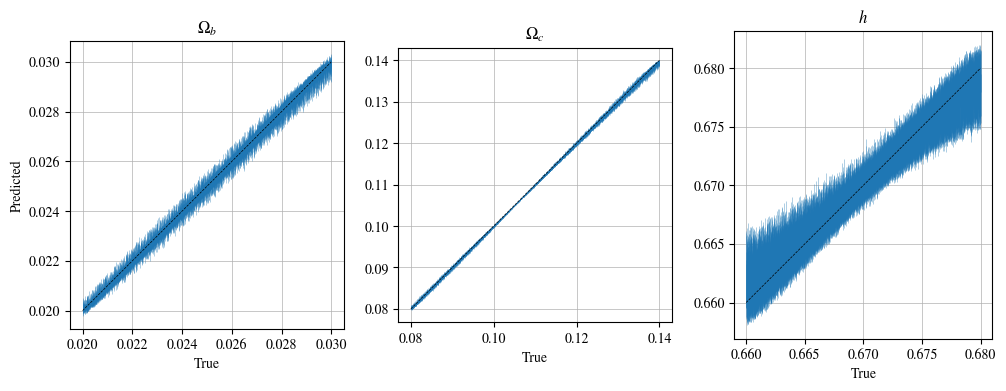

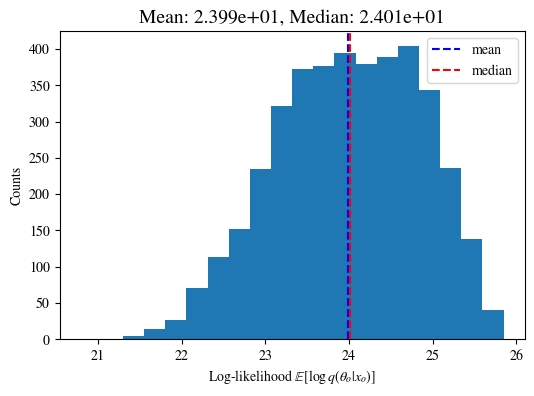

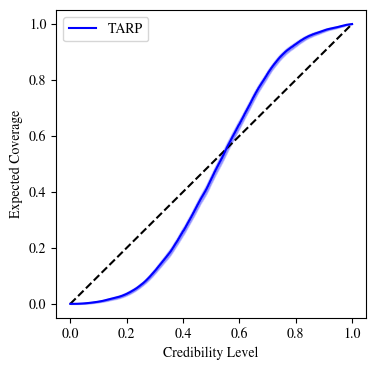

In [158]:
# Drawing samples from the ensemble posterior

metric = PosteriorCoverage(
    num_samples=1000, sample_method='direct', 
    labels=[param_strings_dict[params[i]] for i in range(3)],
    plot_list = ["coverage", "histogram", "predictions", "tarp", "logprob"],
    out_dir=None
)

fig = metric(
    posterior=posterior_ensemble, # NeuralPosteriorEnsemble instance from sbi package
    x=x, theta=theta
)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

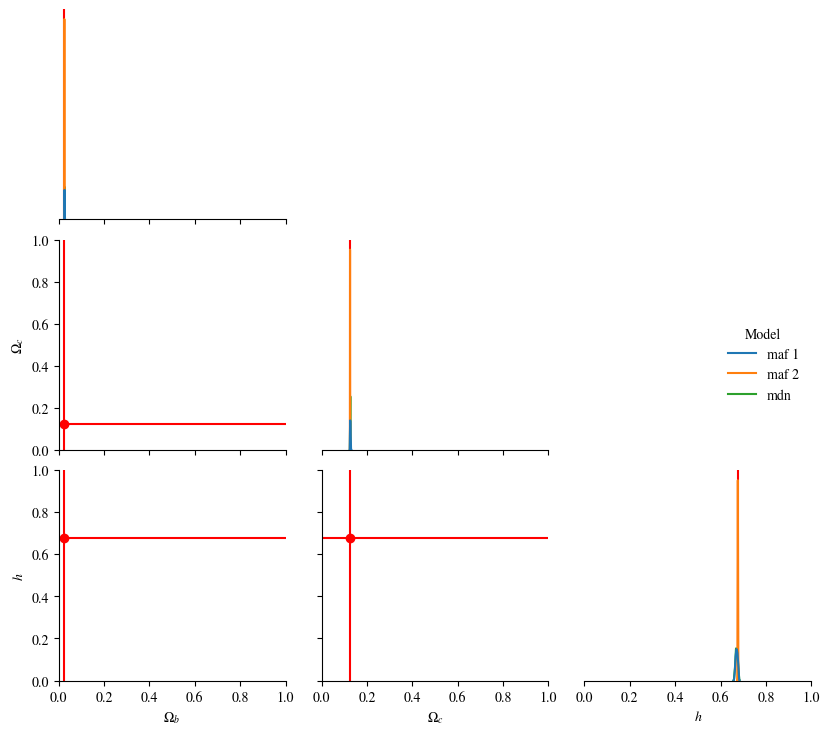

In [159]:
# use ltu-ili's built-in validation metrics to plot the posterior for this point
metric = PlotSinglePosterior(
    num_samples=1000, sample_method='direct', 
    labels=[param_strings_dict[params[i]] for i in range(3)]
)

# plot the posterior for model #1 (MAF)
fig = metric(
    posterior=posterior_ensemble.posteriors[0],
    x_obs = x[ind], theta_fid=theta[ind],
    name='maf 1',
    lower=np.zeros(3), upper=np.ones(3)
)

# plot the posterior for model #1 (MAF)
fig = metric(
    posterior=posterior_ensemble.posteriors[1],
    x_obs = x[ind], theta_fid=theta[ind],
    name='maf 2',
    lower=np.zeros(3), upper=np.ones(3),
    grid = fig
)

# overplot the posterior for model #3 (MDN)
fig = metric(
    posterior=posterior_ensemble.posteriors[2],
    x_obs = x[ind], theta_fid=theta[ind],
    name='mdn',
    lower=np.zeros(3), upper=np.ones(3),
    grid=fig  # overplot on the same figure
)